# Welcome to the world of deep learning!

We are now going to code up a mini MLP. We're going to do both the forward and backward pass, in a very simple way.

There are plenty of software packages that will let you do "deep learning" without needing to know anything about backpropagation. You should still learn it. The second you try to do anything nontrivial, you will almost definitely run into errors that you'll need to understand backprop to debug. For more info, see https://karpathy.medium.com/yes-you-should-understand-backprop-e2f06eab496b.

This is particularly important in the age of LLMs. I'll talk in person a little about about the kinds of problems you can approach with LLMs, and the type you shouldn't.

We're going to implement a very simple version of backprop for just a small MLP. However, the principle is the same for more complicated operations (e.g., attention), and my hope is once you go through the simple MLP example you won't really have difficulties with the more complicated stuff.

## Data
We'll use the make moons dataset. It's very simple, but importantly, it's non linear. A linear classifier cannot solve this problem.

In [1]:
# Our data:
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

In [4]:
import torch
import torch.nn.functional as F
import numpy as np

In [2]:
# Forward and backward passes
def linear(x, W, b):
    pass

def relu(h):
    pass

def bwd_linear(hin, W, b, dhout):
    pass

def bwd_relu(h, dh):
    pass

Now, let's check our work! For this, we'll use the real PyTorch backprop engine. I'll explain how this works in person, but we can use this to compare our manual calculations and they should agree very closely.

In [5]:
torch.manual_seed(32)
y_ = torch.randn(32)
W = torch.randn(32,16)
b = torch.randn(32)
x = torch.randn(16)

for p in [W, b, x]:
    p.requires_grad = True

y = W @ x + b
y1 = F.relu(y)

y1.retain_grad()
y.retain_grad()
l = (0.5 * (y_ - y1)**2).mean()
l.backward()

In [6]:
# Check these grads against your work!

# Your task! Make a loop with a single layer neural network 

What does this need? 
1. Data loading! Let's use `sklearn.make_moons` and make a classifier.
2. Run forward. This is the easy part!
3. Compute loss. What type of loss function makes sense for a classifier?
4. Backprop. Be careful! Feel free to use PyTorch to debug.
5. Update. Use vanilla SGD.
6. How do we store our parameters?

## Caveats! Important things we aren't doing to keep it simple
1. Normalization: Why is this a bit hard?
2. Batch size 1: why are small batch sizes bad?

## Hints:
Break the problem down as much as possible! You will have to compute a few other gradients and some of these are quite hard.

In [9]:
# Here's one possible approach. Why are there transposes everywhere?

def relu(h):
    pass

def softmax(h):
    pass


def loss(probs, idx):
    pass

def bwd_loss(p, idx):
    pass

In [10]:
import torch
import torch.nn as nn
import sklearn

pts, labels = sklearn.datasets.make_moons(100)

In [11]:
# Here's one possible approach!
# We'll make a corresponding torch param set to check our work
params = {
    'up/weight': np.random.randn(2, 16).T,
    'up/bias': np.random.randn(16),
    'fc1/weight': np.random.randn(16, 4*16).T,
    'fc1/bias': np.random.randn(4*16),
    'fc2/weight': np.random.randn(4*16, 16).T,
    'fc2/bias': np.random.randn(16),
    'down/weight': np.random.randn(16, 2).T,
    'down/bias': np.random.randn(2),
}

for k in params:
    params[k] *= 0.1

torch.set_default_dtype(torch.float64)
params_torch = {
    'up': nn.Linear(2, 16),
    'fc1': nn.Linear(16, 16*4),
    'fc2': nn.Linear(16*4, 16),
    'down': nn.Linear(16, 2),
}

params_torch['up'].weight.detach().copy_(torch.from_numpy(params['up/weight']))
params_torch['up'].bias.detach().copy_(torch.from_numpy(params['up/bias']))

params_torch['fc1'].weight.detach().copy_(torch.from_numpy(params['fc1/weight']))
params_torch['fc1'].bias.detach().copy_(torch.from_numpy(params['fc1/bias']))

params_torch['fc2'].weight.detach().copy_(torch.from_numpy(params['fc2/weight']))
params_torch['fc2'].bias.detach().copy_(torch.from_numpy(params['fc2/bias']))

params_torch['down'].weight.detach().copy_(torch.from_numpy(params['down/weight']))
params_torch['down'].bias.detach().copy_(torch.from_numpy(params['down/bias']));

In [10]:

def forward_and_reverse_pass_torch(params, x, y):
    pass


def forward_and_reverse_pass(params, x, y):
    pass

_, ngrad = forward_and_reverse_pass(params, pts[0], labels[0])

# If you want to check your work
_, tgrad = forward_and_reverse_pass_torch(params, pts[0], labels[0])

for k in tgrad:
    print(np.abs(tgrad[k] - ngrad[k]).max())

1.0408340855860843e-17
1.3877787807814457e-17
6.938893903907228e-18
1.3877787807814457e-17
0.0
0.0
0.0
0.0


/var/folders/wz/fjjhczw962550vgqtj9vdr9c0000gn/T/ipykernel_35157/4093434370.py:36: RuntimeWarning: divide by zero encountered in matmul
  h1 = params['fc1/weight'] @ h + params['fc1/bias']
/var/folders/wz/fjjhczw962550vgqtj9vdr9c0000gn/T/ipykernel_35157/4093434370.py:36: RuntimeWarning: overflow encountered in matmul
  h1 = params['fc1/weight'] @ h + params['fc1/bias']
/var/folders/wz/fjjhczw962550vgqtj9vdr9c0000gn/T/ipykernel_35157/4093434370.py:36: RuntimeWarning: invalid value encountered in matmul
  h1 = params['fc1/weight'] @ h + params['fc1/bias']
/var/folders/wz/fjjhczw962550vgqtj9vdr9c0000gn/T/ipykernel_35157/4093434370.py:38: RuntimeWarning: divide by zero encountered in matmul
  h3 = params['fc2/weight'] @ h2 + params['fc2/bias']
/var/folders/wz/fjjhczw962550vgqtj9vdr9c0000gn/T/ipykernel_35157/4093434370.py:38: RuntimeWarning: overflow encountered in matmul
  h3 = params['fc2/weight'] @ h2 + params['fc2/bias']
/var/folders/wz/fjjhczw962550vgqtj9vdr9c0000gn/T/ipykernel_35157/4

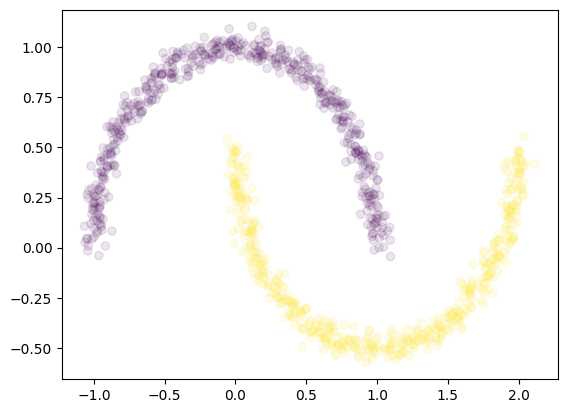

In [11]:
# Okay, now we have all the grads! 
import matplotlib.pyplot as plta

pts, labels = sklearn.datasets.make_moons(1_000)
pts += np.random.randn(*pts.shape) * 0.04
plt.scatter(pts[:, 0], pts[:, 1],c=labels, alpha=0.1)

In [12]:

# SGD
lr = 1e-2
losses = []

params = {
    'up/weight': np.random.randn(2, 16).T,
    'up/bias': np.random.randn(16),
    'fc1/weight': np.random.randn(16, 4*16).T,
    'fc1/bias': np.random.randn(4*16),
    'fc2/weight': np.random.randn(4*16, 16).T,
    'fc2/bias': np.random.randn(16),
    'down/weight': np.random.randn(16, 2).T,
    'down/bias': np.random.randn(2),
}

for k in params:
    params[k] *= 0.1


for _ in range(100_000):
    # load data
    # get gradients
    # make update
    pass

In [13]:
# Now write a forward function to just return the outputs, no gradients
def forward_batch(params, X):
    pass
    

/var/folders/wz/fjjhczw962550vgqtj9vdr9c0000gn/T/ipykernel_35157/3967482934.py:3: RuntimeWarning: divide by zero encountered in matmul
  h  = X @ params['up/weight'].T  + params['up/bias']          # (N,16)
/var/folders/wz/fjjhczw962550vgqtj9vdr9c0000gn/T/ipykernel_35157/3967482934.py:3: RuntimeWarning: overflow encountered in matmul
  h  = X @ params['up/weight'].T  + params['up/bias']          # (N,16)
/var/folders/wz/fjjhczw962550vgqtj9vdr9c0000gn/T/ipykernel_35157/3967482934.py:3: RuntimeWarning: invalid value encountered in matmul
  h  = X @ params['up/weight'].T  + params['up/bias']          # (N,16)
/var/folders/wz/fjjhczw962550vgqtj9vdr9c0000gn/T/ipykernel_35157/3967482934.py:4: RuntimeWarning: divide by zero encountered in matmul
  h1 = h @ params['fc1/weight'].T + params['fc1/bias']          # (N,64)
/var/folders/wz/fjjhczw962550vgqtj9vdr9c0000gn/T/ipykernel_35157/3967482934.py:4: RuntimeWarning: overflow encountered in matmul
  h1 = h @ params['fc1/weight'].T + params['fc1/b

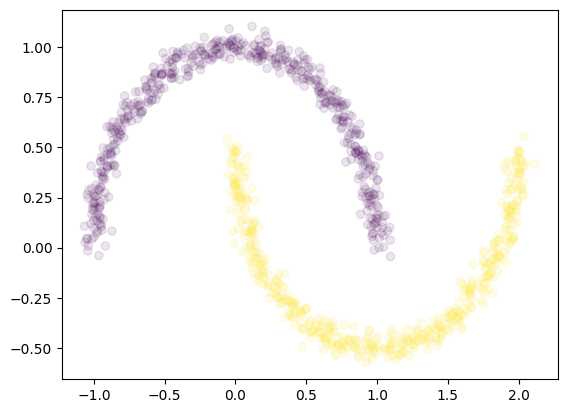

In [19]:
# Test your predictions!
recon_labels = []
p = forward_batch(params, pts)
pred_labels = np.argmax(p, axis=-1)
plt.scatter(pts[:, 0], pts[:, 1], c=pred_labels, alpha=0.1)

/var/folders/wz/fjjhczw962550vgqtj9vdr9c0000gn/T/ipykernel_35157/3967482934.py:3: RuntimeWarning: divide by zero encountered in matmul
  h  = X @ params['up/weight'].T  + params['up/bias']          # (N,16)
/var/folders/wz/fjjhczw962550vgqtj9vdr9c0000gn/T/ipykernel_35157/3967482934.py:3: RuntimeWarning: overflow encountered in matmul
  h  = X @ params['up/weight'].T  + params['up/bias']          # (N,16)
/var/folders/wz/fjjhczw962550vgqtj9vdr9c0000gn/T/ipykernel_35157/3967482934.py:3: RuntimeWarning: invalid value encountered in matmul
  h  = X @ params['up/weight'].T  + params['up/bias']          # (N,16)
/var/folders/wz/fjjhczw962550vgqtj9vdr9c0000gn/T/ipykernel_35157/3967482934.py:4: RuntimeWarning: divide by zero encountered in matmul
  h1 = h @ params['fc1/weight'].T + params['fc1/bias']          # (N,64)
/var/folders/wz/fjjhczw962550vgqtj9vdr9c0000gn/T/ipykernel_35157/3967482934.py:4: RuntimeWarning: overflow encountered in matmul
  h1 = h @ params['fc1/weight'].T + params['fc1/b

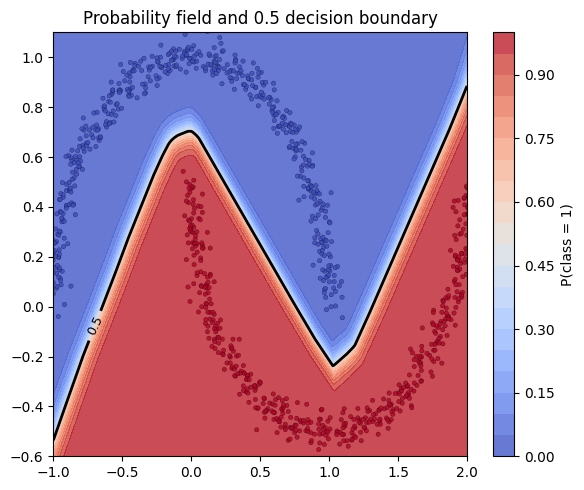

In [27]:
# Test the decision boundary
xs = np.linspace(-1.0, 2.0, 300)
ys = np.linspace(-0.6, 1.1, 300)
XX, YY = np.meshgrid(xs, ys)
grid = np.c_[XX.ravel(), YY.ravel()]  # (N,2)


probs = forward_batch(params, grid)
Z = probs[:, 1].reshape(XX.shape)     # P(class = 1)


plt.figure(figsize=(6, 5))
levels = np.linspace(0, 1, 21)
cf = plt.contourf(XX, YY, Z, levels=levels, vmin=0, vmax=1,
                  cmap='coolwarm', alpha=0.8)

cs = plt.contour(XX, YY, Z, levels=[0.5], colors='k', linewidths=2)
plt.clabel(cs, fmt={0.5: "0.5"}, inline=True, fontsize=9)

plt.scatter(pts[:, 0], pts[:, 1], c=labels, s=10, alpha=0.8,
            cmap='coolwarm', edgecolors='k', linewidths=0.2)

plt.colorbar(cf, label='P(class = 1)')
plt.xlim(xs.min(), xs.max()); plt.ylim(ys.min(), ys.max())
plt.title("Probability field and 0.5 decision boundary")
plt.tight_layout()
plt.show()
